<p align="center">
<FONT FACE="times new roman" SIZE=5>

<i><b>Docente:</b> Darwin Martinez.</i>
<br>
<i><b>Asignatura:</b> Introducción a sistemas inteligentes</i>
<br>
<i><b>Estudiantes:</b> Mitchell Bermin, Andrea Terraza, Miguel Thomas</i>
<br>
<i><b>Grupo:</b> Kyogai</i>
<i>26/02/24</i>
<br>
</FONT>
</p>

In [12]:

import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 1. Función para generar puntos
def generar_puntos(cantidad, dimension):
    """
    Genera una cantidad específica de puntos con la dimensión dada.
    
    Args:
    cantidad (int): Número de puntos a generar.
    dimension (int): Dimensión de cada punto.
    
    Returns:
    np.array: Array de puntos generados.
    """
    # Generamos los puntos con valores aleatorios
    puntos = np.random.rand(cantidad, dimension)
    return puntos

In [14]:
# 2. Función para pintar puntos y la línea aproximada
def pintar_puntos_linea(puntos, coeficientes):
    """
    Pinta los puntos en las primeras 2 dimensiones y la línea aproximada.
    
    Args:
    puntos (np.array): Array de puntos.
    coeficientes (np.array): Coeficientes de la línea [b0, b1, ..., bn].
    """
    # Extraemos solo dos dimensiones (las primeras) 
    x = puntos[:, 0] # Para
    y = puntos[:, -1]
    
    # Pintamos los puntos
    plt.scatter(x, y, color='blue')
    
    # Calculamos y pintamos la línea aproximada en las primeras 2 dimensiones
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = coeficientes[0] + coeficientes[1] * x_line
    plt.plot(x_line, y_line, color='red')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Puntos y línea de regresión')
    plt.show()


In [15]:
# 3. Función para encontrar la línea de regresión lineal multivariada
def linea_aproximada(puntos):
    """
    Encuentra la línea de regresión lineal multivariada.
    
    Args:
    puntos (np.array): Array de puntos.
    
    Returns:
    np.array: Coeficientes de la línea [b0, b1, ..., bn].
    """
    puntos = np.array(puntos)
    X = puntos[:, :-1]  # Todas las columnas menos la última
    y = puntos[:, -1]   # La última columna
    
    # Suponiendo que X e y son tus datos, los convertimos a arreglos de NumPy para asegurar compatibilidad.
    X = np.array(X).astype(float)  # Asegúrate de que X sea un arreglo de NumPy y conviértelo a float
    y = np.array(y).astype(float)  # Convierte y a un arreglo de NumPy y a float si aún no lo es
    # Añadimos una columna de unos para el término independiente
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculamos los coeficientes usando la ecuación normal
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y
    return coeficientes

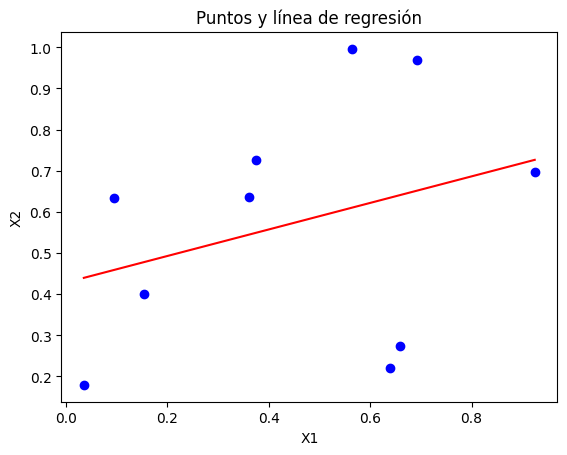

In [16]:
cantidad_puntos = 10
dimension_puntos = 2 # Incluyendo la dimensión para 'y'

# Generamos puntos aleatorios
puntos = generar_puntos(cantidad_puntos, dimension_puntos)

# Obtenemos los coeficientes de la regresión lineal multivariada
coeficientes = linea_aproximada(puntos)

# Pintamos los puntos y la línea de regresión
pintar_puntos_linea(puntos, coeficientes)



# PUNTO 4

* Primer Conjutno de datos: Recaudo Aporte Voluntario Impuesto Predial
    * Numero de datos (Filas): 91
    * Columnas: 6
        * Año Presentacion: Año en el que se hizo el reporte
        * Concepto_impuesto: Tipo de impuesto en el que se contribuyo
        * Estrato: Estrato
        * No CONTRIBUYENTES: numero de personas que contribuyeron
        * Valor: Valor total contribuido

* Segundo Conjunto de datos: Temperatura en Bogotá D.C. 
    * Temperatura máxima: describe el valor númerico en  grados Celcius de la mayor temperatura alcanzada
    * Temperatura mínima: describe el valor númerico en  grados Celcius de la menor temperatura alcanzada
    * Temperatura promedio: describe el valor númerico en  grados Celcius de la temperatura promedio alcanzada 
    * Enos: corresponde al fenomeno climático que se presenta en Bogotá, clasificandose entre Niño, Niña o Neutro
        Se realizo una codificacion manual de las variables para darle un numero categorico a cada categoria.
        Niño: 1
        Niña: 2
        Neutro: 3



In [17]:
import pandas as pd
# Recaudo aporte voluntario impuesto predial
aporte_dataset = pd.read_csv("Aporte voluntario de impuesto predial.csv",encoding="latin1", delimiter=";")
aporte_dataset.head()

,ID,AÑO PRESENTACION,CONCEPTO_IMPUESTO,ESTRATO,No CONTRIBUYENTES,VALOR APORTE VOLUNTARIO
0,1,2006,PREDIAL,0,1622,95410400
1,2,2006,PREDIAL,1,1095,3049000
2,3,2006,PREDIAL,2,7112,34376000
3,4,2006,PREDIAL,3,7530,119270150
4,5,2006,PREDIAL,4,3833,109590300


In [18]:
# Temperatura bogota
temp_dataset = pd.read_csv("osb_temperatura.csv",encoding="latin1",delimiter=";")
temp_dataset.head()

,Año,Mes,Temperatura Máxima,Temperatura Mínima,Temperatura promedio,Enos
0,2007,Enero,26.4,4.4,14.1,1
1,2007,Febrero,25.4,-4.6,13.5,3
2,2007,Marzo,24.0,5.1,14.2,3
3,2007,Abril,23.0,6.6,14.8,3
4,2007,Mayo,21.9,5.9,13.3,3


## __A) Seleccione dos columnas numéricas del data set seleccionado y pruebe la regresión lineal par dos variables__


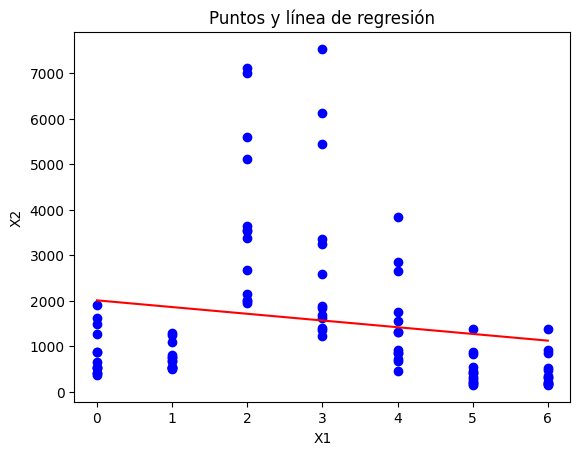

In [19]:
# CONJUNTO DE DATOS: 
X = np.array(aporte_dataset["ESTRATO"]).reshape(-1, 1)
y = np.array(aporte_dataset["No CONTRIBUYENTES"])

puntos = np.hstack((X, y.reshape(-1, 1)))  # Creamos una estructura de puntos


# Obtenemos la línea con la aproximación planteada
coeficientes = linea_aproximada(puntos)

# Pintamos los puntos y la línea
pintar_puntos_linea(puntos, coeficientes)

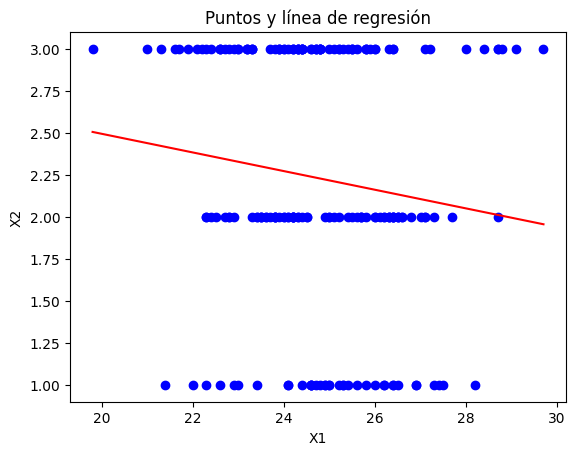

In [20]:

# CONJUNTO DE DATOS: Recaudo Aporte Voluntario Impuesto Predial
X = np.array(temp_dataset["Temperatura Máxima"]).reshape(-1, 1)
y = np.array(temp_dataset["Enos "])
puntos = np.hstack((X, y.reshape(-1, 1)))  # Creamos una estructura de puntos


# Obtenemos la línea con la aproximación planteada
coeficientes = linea_aproximada(puntos)

# Pintamos los puntos y la línea
pintar_puntos_linea(puntos, coeficientes)

## __B)Seleccione una columa como la variable dependiente, y al menos 3 variables num´ericas m´s como las variables del modelo multivariado y pruebe la regresi´on lineal.__

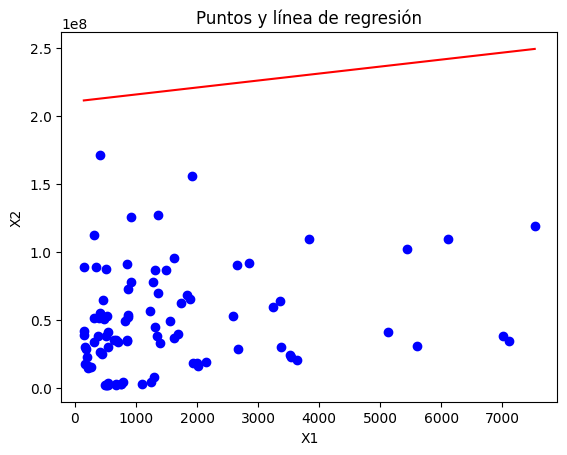

In [21]:
x1 = np.array(aporte_dataset["AÑO PRESENTACION"]).reshape(-1,1)
x2 = np.array(aporte_dataset["ESTRATO"]).reshape(-1,1)
x3 = np.array(aporte_dataset["No CONTRIBUYENTES"]).reshape(-1,1)
X = np.hstack((x3, x1,x2))

y = aporte_dataset["VALOR APORTE VOLUNTARIO"]
y = np.array(y)


puntos = np.hstack((X, y.reshape(-1, 1)))  # Creamos una estructura de puntos

# Obtenemos la línea con la aproximación planteada
coeficientes = linea_aproximada(puntos)

# Pintamos los puntos y la línea
pintar_puntos_linea(puntos, coeficientes)



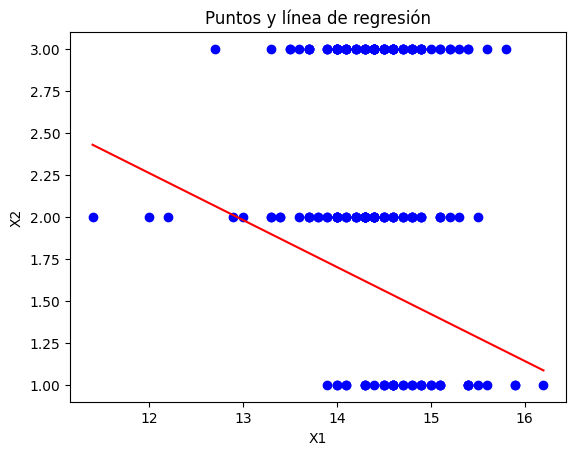

In [22]:
x1 = np.array(temp_dataset["Temperatura Máxima"]).reshape(-1,1)
x2 = np.array(temp_dataset["Temperatura Mínima"]).reshape(-1,1)
x3 = np.array(temp_dataset["Temperatura promedio"]).reshape(-1,1)
X = np.hstack((x3, x2,x1))

y = temp_dataset["Enos "]
y = np.array(y)


puntos = np.hstack((X, y.reshape(-1, 1)))  # Creamos una estructura de puntos

# Obtenemos la línea con la aproximación planteada
coeficientes = linea_aproximada(puntos)

# Pintamos los puntos y la línea
pintar_puntos_linea(puntos, coeficientes)

